## 0. Computer Vision libraries in Pytorch

`torchvision`
`torchtext`
`torchaudio`
`torchmetrics`


In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.4.0+cu121
0.19.0+cu121


#1. Getting a dataset

The dataset we will be using is FashionMNIST.

In [2]:
# Setup training data
from torchvision import datasets
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)


test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 9396371.46it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 155495.81it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 1021670.32it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18646180.48it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# Check the shape of our image
image.shape, label #greyscale images have one color channel

(torch.Size([1, 28, 28]), 9)

### 1.2 Visualising our data

Image shape: torch.Size([1, 28, 28]), Label: 9, Class: Ankle boot


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

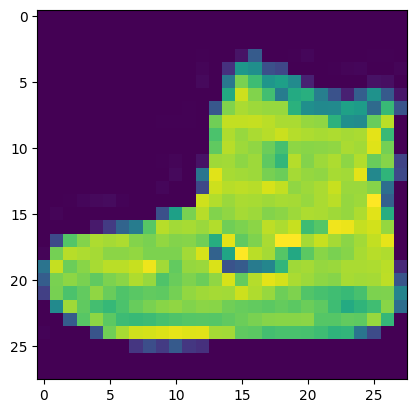

In [8]:
import matplotlib.pyplot as plt
image,label=train_data[0]
print(f"Image shape: {image.shape}, Label: {label}, Class: {class_names[label]}")
plt.imshow(image.squeeze())
plt

(-0.5, 27.5, 27.5, -0.5)

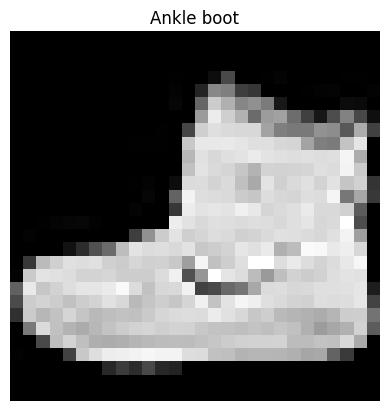

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

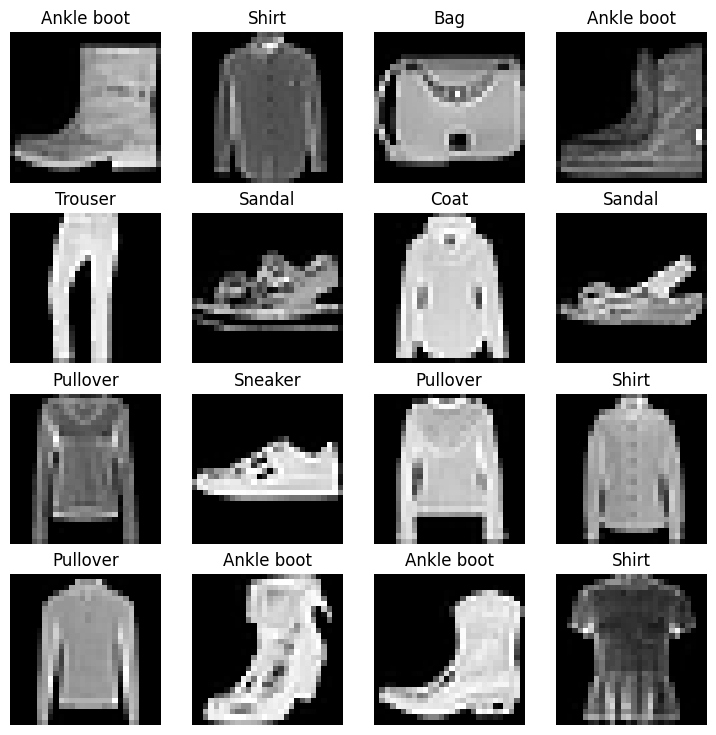

In [10]:
# Plot more images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows, cols=4,4
for i in range(1, rows*cols+1):
  random_idx=torch.randint(0, len(train_data), size=[1]).item()
  image, label=train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch datasets.

DataLoader turns our dataset into a Python Iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why?

1. It is more computationally efficient.
2. It is easier to manipulate data when it is in batches.
3. Often times we want to turn our data into batches to speed up the training process.
4. It gives our neural network more chances to update its gradients per epoch.


In [11]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader=DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_dataloader, train_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b69123e7490>,
 <torch.utils.data.dataloader.DataLoader at 0x7b6910208b80>)

In [12]:
# Let's check out what we have created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b6910208b80>, <torch.utils.data.dataloader.DataLoader object at 0x7b69123e7490>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [13]:
#Check out whats inside the training dataloader
train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label:8


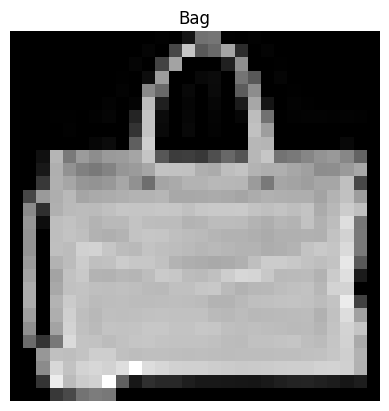

In [14]:
# show a sample
# torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Label:{label}")

##3. Model 0: Build a baseline model

When starting to build a series of ML Modelling experiences, it's best to start with something simple.

A baseline model is a simple model you will try to improve upon with subsequent models/experiments.

In [15]:
# Create a flatten layer
flatten_model=nn.Flatten()

# Get a single sample
X=train_features_batch[0]
print(X.shape)

#Flatten the sample
output=flatten_model(X)
output.shape

torch.Size([1, 28, 28])


torch.Size([1, 784])

In [16]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [17]:
torch.manual_seed(42)
model_0=FashionMNISTModelV0(
      input_shape=784,
      hidden_units=10,
      output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function- since we're working with multi-class data, our loss function will be nn.CrossEntropyLoss()
* Optimizer - torch.optim.SGD()
* Evaluation metrics - accuracy

In [19]:
import requests
from pathlib import Path

# Download helper functions from learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [20]:
#Import accuracy metric
from helper_functions import accuracy_fn

#Setup loss function and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

2 of the main things to track are:
1. Model's performance
2. How fast it runs

In [21]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [22]:
start_time=timer()
end_time=timer()
print_train_time(start=start_time, end=end_time)

Train time on None: 0.000 seconds


4.280200002426682e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss (Per batch)
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.

In [23]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 32.497 seconds


##4. Making predictions and get Model 0 results

In [24]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """
  Evaluates a given model on a given dataset.
  """
  loss, acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      y_pred=model(X)
      loss+=loss_fn(y_pred, y)
      acc+=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    loss/=len(data_loader)
    acc/=len(data_loader)
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

#Calculate model 0 results on test dataset
model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code

In [25]:
import torch
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 6. Model 1: building a better model with non-linearity



In [26]:
# Let's create a model with non-linear & linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [27]:
# Create an instance of model_1
torch.manual_seed(42)
model_1=FashionMNISTModelV1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer & evaluation metrics


In [28]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Lets create a function for:
* training loop-`train_step()`
* testing loop- `test_step()`

In [29]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):

  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc=0,0
  model.train()
### Training
  train_loss = 0
  # Add a loop to loop through training batches
  for batch, (X, y) in enumerate(train_dataloader):
      X, y = X.to(device), y.to(device)
      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate loss & accuracy (per batch)
      loss = loss_fn(y_pred, y)
      train_loss += loss # accumulatively add up the loss per epoch
      train_acc+=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

      # Print out how many samples have been seen
      if batch % 400 == 0:
          print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader (average loss per batch per epoch)
  train_loss /= len(data_loader)
  train_acc /=len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%\n")

In [30]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [31]:
torch.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set the number of epochs
epochs = 3

#Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(data_loader=test_dataloader,
            model=model_1,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,end=train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 1.09199 | Train acc: 61.34%

Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.78101 | Train acc: 71.93%

Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.67027 | Train acc: 75.94%

Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 32.181 seconds


In [32]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [33]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a CNN

In [34]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [35]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

### 7.1 Stepping through nn.Conv2d


In [36]:
torch.manual_seed(42)

#Create a batch of images
images=torch.randn(size=(32, 3, 64, 64)).to(device)
test_image=images[0]

print(f"Shape of batch image: {images.shape}")
print(f"Shape of test image: {test_image.shape}")
print(f"Test image: {test_image}")

Shape of batch image: torch.Size([32, 3, 64, 64])
Shape of test image: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [

In [37]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [39]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer=nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)
conv_layer = conv_layer.cuda()
# Pass the data through the convulational layer
conv_output=conv_layer(test_image.unsqueeze(dim=0))
conv_output.shape

torch.Size([1, 10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d`

In [40]:
#Print out original image shape without unsqueeze
print(f"Original Shape of test image: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}\n")

#Create a sample nn.Maxpool2d layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

#pass data through just the conv_layer
test_image_through_conv=conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape of test image after passing through conv_layer: {test_image_through_conv.shape}\n")

#Pass data through the max_pool_layer
test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
print(f"Shape after going through MaxPool and Conv layer: {test_image_through_conv_and_max_pool.shape}")

Original Shape of test image: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])

Shape of test image after passing through conv_layer: torch.Size([1, 10, 62, 62])

Shape after going through MaxPool and Conv layer: torch.Size([1, 10, 31, 31])


In [42]:
torch.manual_seed(42)
#Create a random tensor with a similar number of dimensions to oour images
random_tensor=torch.randn(size=(1,1,2,2))
print(f"Random Tensor:{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

max_pool_layer=nn.MaxPool2d(kernel_size=2)
max_pool_layer_tensor=max_pool_layer(random_tensor)
print(f"Max Pool Tensor:{max_pool_layer_tensor}")
print(f"Max pool tensor shape: {max_pool_layer_tensor.shape}")

Random Tensor:tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])
Max Pool Tensor:tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer

In [43]:
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(), lr=0.1)


### 7.4 Training and testing model_2 using our training and testing functions

In [44]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2=timer()

# Train & test model
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(data_loader=test_dataloader,
            model=model_2,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)



train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2, end=train_time_end_model_2, device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.58793 | Train acc: 78.59%

Test loss: 0.38857 | Test accuracy: 85.78%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.36025 | Train acc: 87.07%

Test loss: 0.34527 | Test accuracy: 87.18%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.32423 | Train acc: 88.17%

Test loss: 0.33645 | Test accuracy: 88.00%

Train time on cuda: 37.395 seconds


In [45]:
#Get model_2 results
model_2_results= eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33644750714302063,
 'model_acc': 87.99920127795527}

## 8. Compare model results and training time

In [46]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results=compare_results.set_index("model_name")
compare_results

,model_loss,model_acc
model_name,,
FashionMNISTModelV0,0.476639,83.426518
FashionMNISTModelV1,0.685001,75.019968
FashionMNISTModelV2,0.336448,87.999201


In [47]:
#Add training time to results comparison
compare_results["training time"]=[total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_train_time_model_2]
compare_results

,model_loss,model_acc,training time
model_name,,,
FashionMNISTModelV0,0.476639,83.426518,32.496903
FashionMNISTModelV1,0.685001,75.019968,32.181438
FashionMNISTModelV2,0.336448,87.999201,37.394914


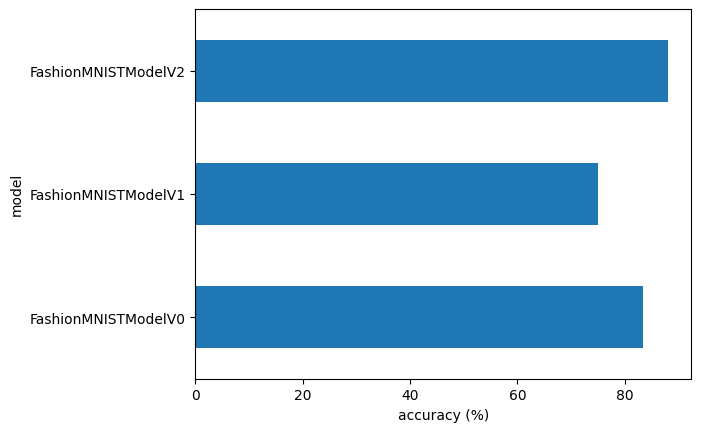

In [48]:
# Visualize our model results
compare_results["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

##9. Make and evaluate random predictions with the best model

In [49]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample,dim=0).to(device)

      #Forward pass
      pred_logit=model(sample)
      #Get pred prob
      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [50]:
import random
# random.seed(42)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Bag')

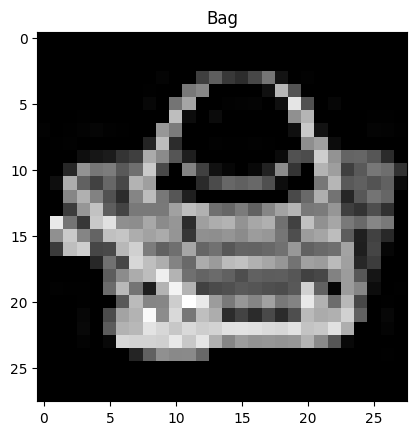

In [51]:
plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]])

In [52]:
# Make predictions
pred_probs=make_predictions(model=model_2, data=test_samples)
pred_probs[:2]

tensor([[5.0674e-03, 1.7107e-05, 1.1508e-03, 2.5236e-04, 3.7938e-03, 1.7285e-03,
         3.8890e-03, 3.6857e-04, 9.8372e-01, 9.1329e-06],
        [1.7409e-04, 5.0804e-05, 1.5346e-04, 1.0200e-04, 1.8027e-04, 1.0555e-02,
         4.0186e-04, 4.4242e-01, 3.3716e-03, 5.4259e-01]])

In [53]:
#Converting pred probs into labels
pred_labels=torch.argmax(pred_probs, dim=1)
pred_labels

tensor([8, 9, 9, 3, 4, 8, 1, 0, 8])

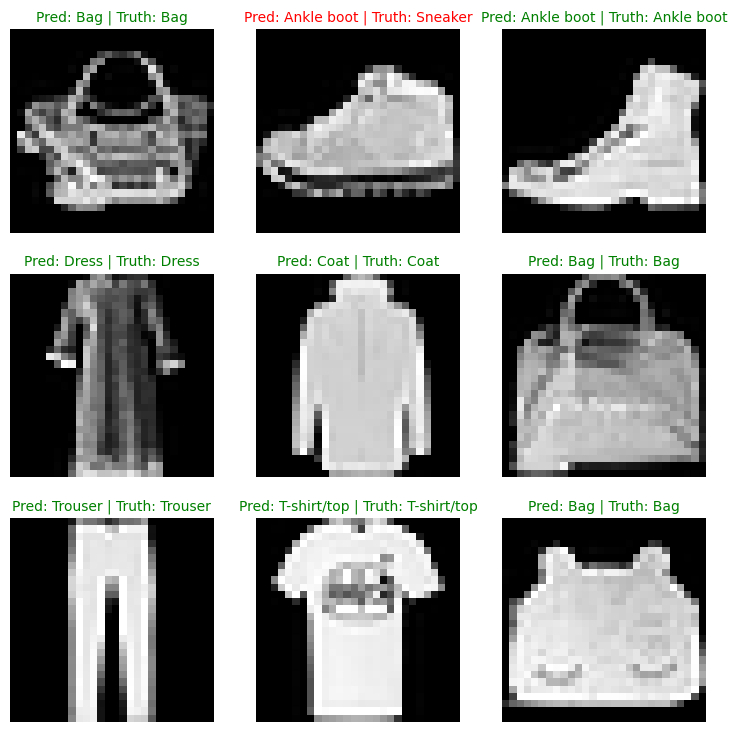

In [54]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)

  #plot target image
  plt.imshow(sample.squeeze(),cmap='gray')

  #Find pred labels in text form
  pred_label=class_names[pred_labels[i]]

  #Get the truth label (in text form)
  truth_label=class_names[test_labels[i]]

  #Create a title for the plot
  title_text=f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label==truth_label:
    plt.title(title_text, fontsize=10, color='green')
  else:
    plt.title(title_text, fontsize=10, color='red')
  plt.axis(False)

## 10. Making a confusion matrix for further evaluation

In [55]:
#Import tqdm.auto
from tqdm.auto import tqdm

#Make predicitons with our trained model on the test dataset
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making predictions....."):
    X,y=X.to(device), y.to(device)
    #Forward Pass
    y_logit=model_2(X)
    y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor

Making predictions.....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 0, 1, 8])

In [56]:
len(y_pred_tensor)

10000

In [57]:
try:
  import torchmetrics, mlxtend
  print(f"torchmetrics and mlxtend are available")
  assert int(mlxtend.__version__.split(".")[1])>=19,"mlxtend version lower"
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(mlxtend.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 44.7 MB/s eta 0:00:00
0.23.1


In [58]:
import mlxtend

In [60]:
test_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

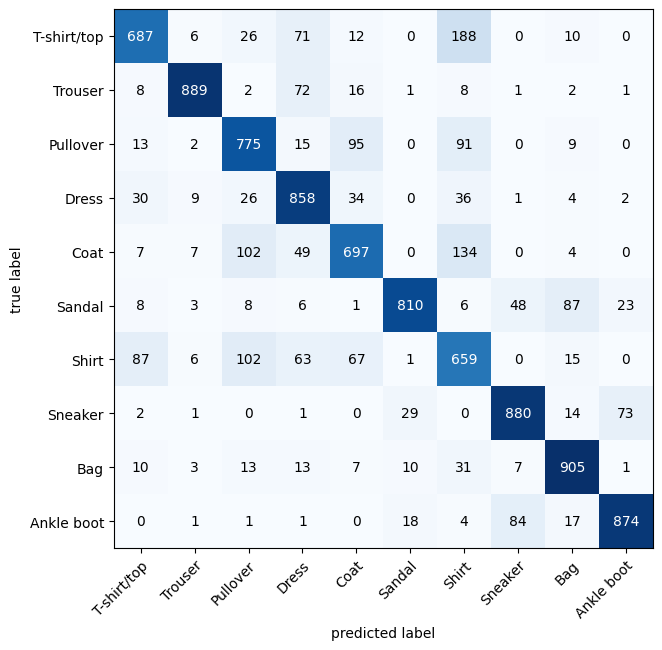

In [63]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. Setup confusion instance and compare predicitons to target
confmat=ConfusionMatrix(num_classes=len(class_names),task="multiclass")
confmat_tensor=confmat(preds=y_pred_tensor, target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                              figsize=(10,7),
                              class_names=class_names
)

## 11. Save & load best performing model

In [65]:
from pathlib import Path

#Create model directory path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#Create model save
MODEL_NAME="03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [67]:
#Create a new instance
torch.manual_seed(42)

loaded_model_2=FashionMNISTModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

<ipython-input-67-f6f2ccd9c977>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [68]:
#Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results=eval_model(model=loaded_model_2,
                                  data_loader=test_dataloader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn,
                                  device=device)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33644750714302063,
 'model_acc': 87.99920127795527}

In [69]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33644750714302063,
 'model_acc': 87.99920127795527}

In [70]:
#Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
                           torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)